In [33]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt


class Account:
    _account_counter = 1000

    def __init__(self, owner_name: str, start_balance: float = 0):
        if start_balance < 0:
            raise ValueError("Начальный баланс не может быть отрицательным")

        Account._account_counter += 1
        self.account_number = f"ACC-{Account._account_counter}"
        self.owner_name = owner_name
        self._balance = start_balance
        self.operations_list = []

    def deposit(self, money_amount: float):
        if money_amount <= 0:
            raise ValueError("Сумма пополнения должна быть положительной")
        self._balance += money_amount
        self._add_operation("deposit", money_amount, "success")

    def withdraw(self, money_amount: float):
        if money_amount <= 0:
            raise ValueError("Сумма снятия должна быть положительной")
        if money_amount > self._balance:
            self._add_operation("withdraw", money_amount, "fail")
            print("Недостаточно средств для снятия")
        else:
            self._balance -= money_amount
            self._add_operation("withdraw", money_amount, "success")

    def get_balance(self):
        return self._balance

    def get_history(self):
        if not self.operations_list:
            print("История операций пуста.")
            return
        df = pd.DataFrame(self.operations_list)
        df["time"] = df["time"].dt.strftime("%Y-%m-%d %H:%M:%S")
        print(df[["time", "type", "amount", "balance_after", "status"]])

    def _add_operation(self, operation_type, money_amount, status):
        operation = {
            "time": datetime.now(),
            "type": operation_type,
            "amount": money_amount,
            "balance_after": self._balance,
            "status": status
        }
        self.operations_list.append(operation)

    #Это верный метод, но он показывает мне диапазон дат за несколько лет. Из-за этого на графике просто вертикальная прямая
    #Поэтому ниже есть метод где я через индексы это сделал, чтобы график не выглядел как прямая
    # def plot_history(sнelf):
    #     if not self.operations_list:
    #         print("История операций пуста.")
    #         return
    #     df = pd.DataFrame(self.operations_list)
    #     plt.figure(figsize=(10, 5))
    #     plt.plot(df["time"], df["balance_after"], marker="o", linestyle="-")
    #     plt.title(f"Изменение баланса для счёта {self.account_number}")
    #     plt.xlabel("Время операции")
    #     plt.ylabel("Баланс")
    #     plt.grid(True)
    #     plt.show()

    
    def plot_history(self):
        if not self.operations_list:
            print("История операций пуста")
            return

        df = pd.DataFrame(self.operations_list)
        df["operation_number"] = range(1, len(df) + 1)

        plt.figure(figsize=(10, 5))
        plt.plot(df["operation_number"], df["balance_after"], marker="o", linestyle="-")
        plt.title(f"Изменение баланса для счёта {self.account_number}")
        plt.xlabel("Номер операции")
        plt.ylabel("Баланс")
        plt.grid(True)
        plt.show()

    def show_top_operations(self, n=3):
        if not self.operations_list:
            print("История операций пуста.")
            return
            
        df = pd.DataFrame(self.operations_list)
        df_sorted = df.sort_values(by=["amount", "time"], ascending=[False, False])
        print(f"\nТоп-{n} крупных операций:")
        print(df_sorted.head(n)[["time", "type", "amount", "status"]])




Недостаточно средств для снятия
Текущий баланс: 600
                  time      type  amount  balance_after   status
0  2025-11-09 21:45:51   deposit     200            700  success
1  2025-11-09 21:45:51  withdraw     100            600  success
2  2025-11-09 21:45:51  withdraw     800            600     fail


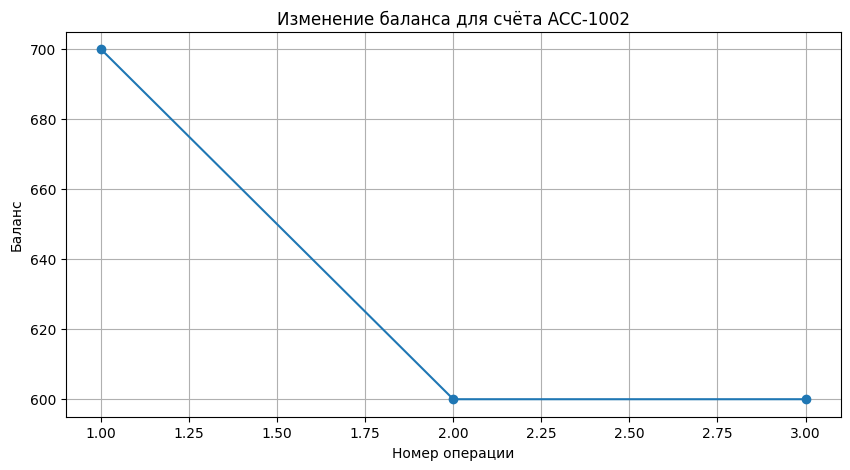

In [35]:

acc = Account("Денис Томахин", 500)

acc.deposit(200)
acc.withdraw(100)
acc.withdraw(800)  #нет деняк

print("Текущий баланс:", acc.get_balance())

acc.get_history()

# Строим график изменения баланса
acc.plot_history()


Недостаточно средств для снятия
Текущий баланс: 700
                  time      type  amount  balance_after   status
0  2025-11-09 21:46:06   deposit     200            700  success
1  2025-11-09 21:46:06  withdraw     100            600  success
2  2025-11-09 21:46:06  withdraw     800            600     fail
3  2025-11-09 21:46:06   deposit     500           1100  success
4  2025-11-09 21:46:06  withdraw     400            700  success


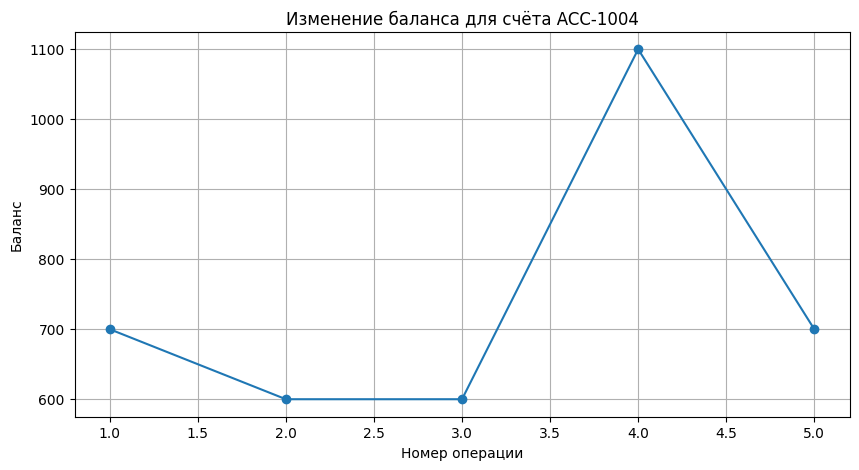

In [37]:

acc = Account("Сын Дениса", 500)

acc.deposit(200)
acc.withdraw(100)
acc.withdraw(800)  #нет деняк
acc.deposit(500)
acc.withdraw(400)

print("Текущий баланс:", acc.get_balance())

acc.get_history()

# Строим график изменения баланса
acc.plot_history()

In [38]:
class CheckingAccount(Account):
    account_type = "checking"


class SavingsAccount(Account):
    account_type = "savings"

    def withdraw(self, money_amount: float):
        if money_amount <= 0:
            raise ValueError("Сумма снятия должна быть положительной.")
        limit = self._balance * 0.5
        if money_amount > limit:
            self._add_operation("withdraw", money_amount, "fail")
            print("Нельзя снять больше 50% от текущего баланса.")
        else:
            self._balance -= money_amount
            self._add_operation("withdraw", money_amount, "success")

    def apply_interest(self, rate: float):
        if rate < 0:
            raise ValueError("Процентная ставка не может быть отрицательной.")
        interest = self._balance * (rate / 100)
        self._balance += interest
        self._add_operation("interest", interest, "success")

    def show_top_operations(self, n=3):
        if not self.operations_list:
            print("История операций пуста.")
            return
        df = pd.DataFrame(self.operations_list)
        df_sorted = df.sort_values(by=["amount", "time"], ascending=[False, False])
        print(f"\nТоп-{n} крупных операций:")
        print(df_sorted.head(n)[["time", "type", "amount", "status"]])


Топ-3 крупных операций:
                        time      type  amount   status
1 2025-11-09 21:46:10.271644  withdraw     500  success
0 2025-11-09 21:46:10.271644   deposit     300  success
Нельзя снять больше 50% от текущего баланса.

Топ-3 крупных операций:
                        time      type  amount   status
1 2025-11-09 21:46:10.275643  withdraw  1200.0     fail
2 2025-11-09 21:46:10.275643  withdraw   800.0  success
0 2025-11-09 21:46:10.275643  interest   140.0  success


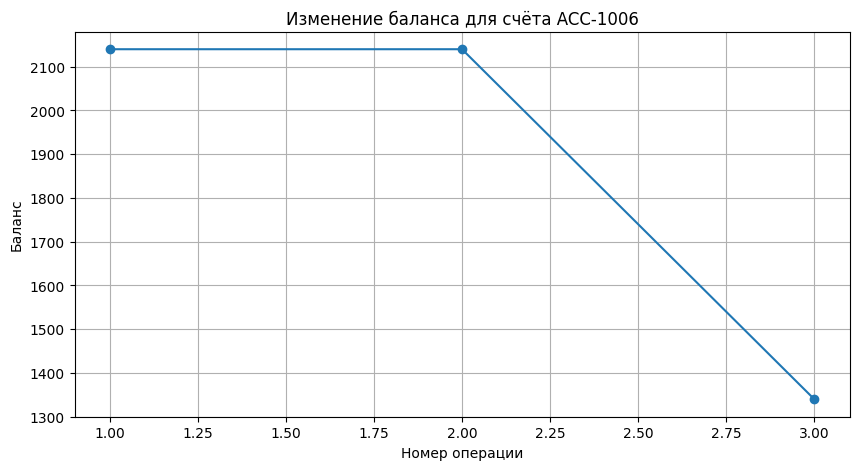

In [39]:
checking = CheckingAccount("Денис Томахин", 1000)
checking.deposit(300)
checking.withdraw(500)
checking.show_top_operations()

savings = SavingsAccount("Дочь Дениса", 2000)
savings.apply_interest(7)
savings.withdraw(1200)
savings.withdraw(800)
savings.show_top_operations()
savings.plot_history()